# Chamfer matching
reference: https://richarddzh.gitbooks.io/book1/content/chamfer_matching.html

In [1]:
using Images, ImageDraw
using Colors
using FileIO
using Interpolations
using Plots

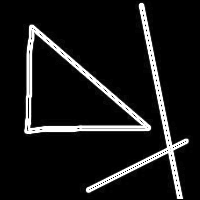

In [2]:
include("imageops.jl")
img = load("./images/input/geom.jpg")
img = Gray{Float32}.(img)
img = sobel(img)

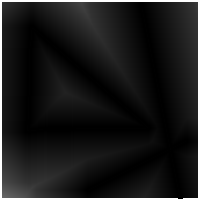

In [3]:
# distance tranform
e = distance_transform(img, m_iterations=50)
Gray.(e)

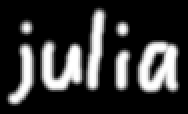

In [27]:
needle = load("./images/input/needle.png")
needle = Gray{Float32}.(needle)

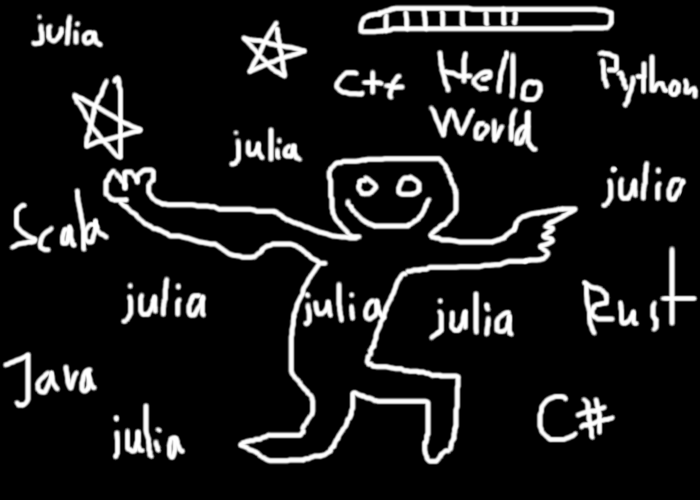

In [34]:
haystack = load("./images/input/haystack.png")
haystack = Gray{Float32}.(haystack)

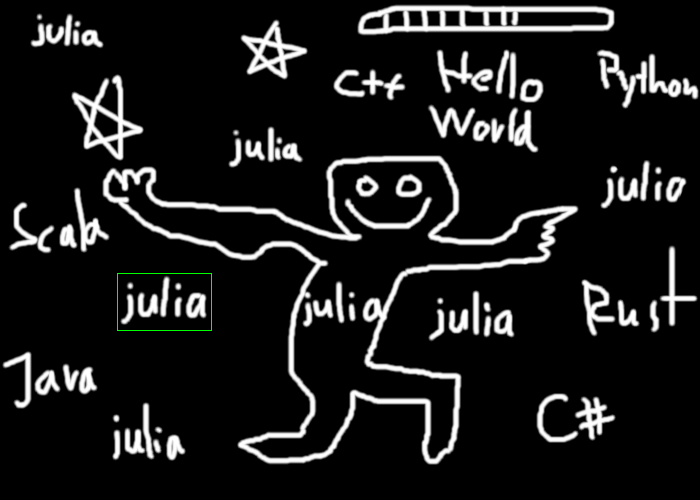

In [35]:
function visualize_chamfer_results(haystack::Matrix{Gray{Float32}}, needle_size::Tuple{Int,Int}, results::Vector{Tuple{Int,Int,Float32}})
    haystack2 = RGB{Float32}.(copy(haystack))
    nh,nw = needle_size
    for (x,y,s) in results
        draw!(haystack2, Polygon(RectanglePoints(Point(x, y), Point(x+nw, y+nh))), RGB{Float32}(0.0, 1.0, 0.0))
    end
    haystack2
end

results = chamfer_matching(haystack, needle, step_size=(3,3), threshold=0.015)
visualize_chamfer_results(haystack, size(needle), results[1:3])

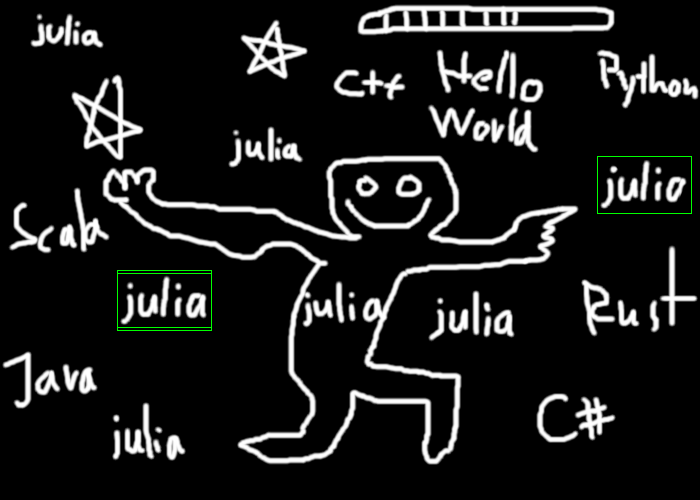

In [37]:
visualize_chamfer_results(haystack, size(needle), results)